In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


pd.options.display.max_columns = None
pd.options.display.max_rows = 100


df = pd.read_csv('data/kc_house_data_original.csv')


In [2]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.price.max(), df.price.min()

(7700000.0, 78000.0)

In [4]:
df[df.bathrooms == 7.75].price.mean()

6890000.0

In [5]:
df[df.yr_built > 2000].price.mean(), df[df.yr_built < 2000].price.mean()

(615650.5489202292, 518157.2423252776)

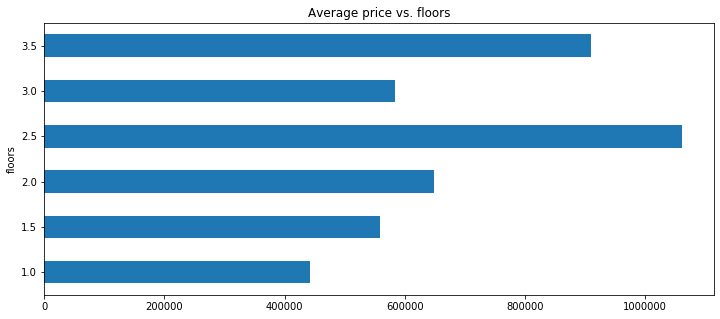

In [6]:
def bar_average(df,x,y, h = False):
    plt.figure(figsize = (12,5))
    x_grouped = df.groupby(f'{x}')[f'{y}'].mean()
    if h:
        x_grouped.plot.barh() 
    else: 
        x_grouped.plot.bar()
    plt.title(f'Average {y} vs. {x}')
#bathrooms vs. price
#bar_average(df, 'bathrooms', 'price', h= True)

#waterfront vs price
#bar_average(df, 'waterfront', 'price', h= True)

#grade vs price 
#bar_average(df, 'grade', 'price', h= True)

#condition vs. price 
bar_average(df, 'floors', 'price', h= True)

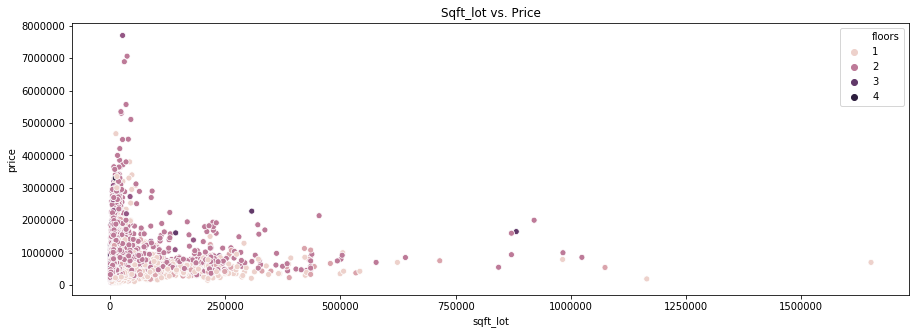

In [7]:
def plot_scatter(df, x,y, h = None): 
    plt.figure(figsize = (15,5))
    plt.title(f'{x.capitalize()} vs. {y.capitalize()}')
    sns.scatterplot(x=x, y=y, data=df, hue = h)

plot_scatter(df, 'sqft_lot', 'price', h = 'floors')


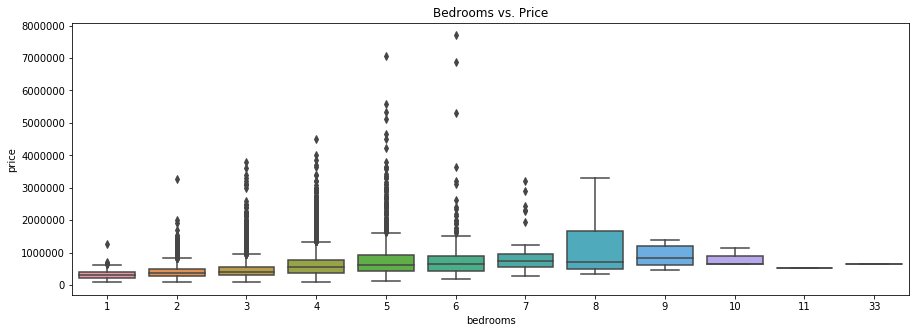

In [8]:
def plot_box(df, x,y): 
    plt.figure(figsize = (15,5))
    plt.title(f'{x.capitalize()} vs. {y.capitalize()}')
    sns.boxplot(x=x, y=y, data=df)

#plot_box(df, 'waterfront', 'price')
#plot_box(df,'floors', 'price')
plot_box(df, 'bedrooms', 'price')



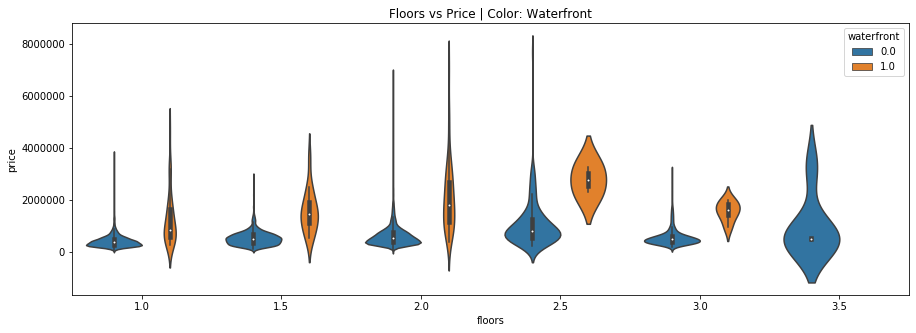

In [9]:
def violin_plot(df, x, y, h):
    plt.figure(figsize= (15,5))
    sns.violinplot(x = x, y = y, hue = h, data=df)
    plt.title(f'{x.capitalize()} vs {y.capitalize()} | Color: {h.capitalize()}')
violin_plot(df, 'floors', 'price', 'waterfront')

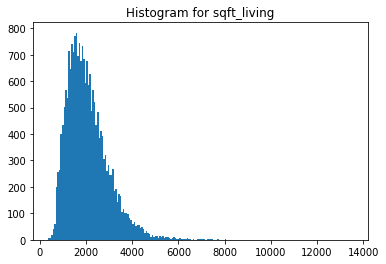

In [14]:
def plot_histogram(df, column): 
    plt.hist(df[column], bins=200)
    plt.title(f'Histogram for {column}')
plot_histogram(df, 'sqft_living')

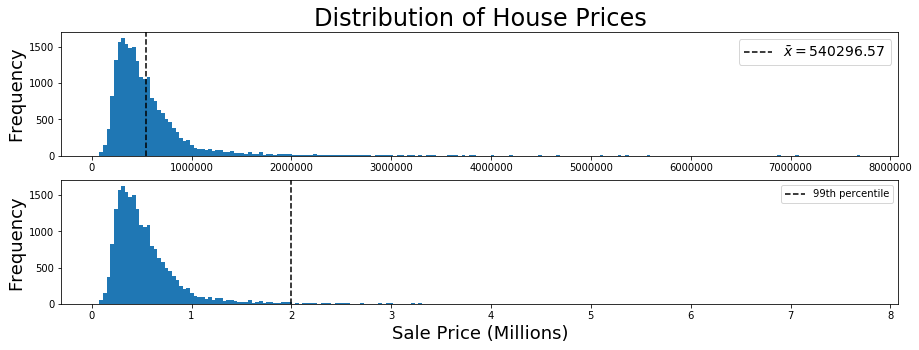

In [22]:
def house_price_distribution(df):
    fig, ax = plt.subplots(2,1, figsize = (15,5))

    df.price.plot(kind='hist', bins=210, ax = ax[0])
    ax[0].set_ylabel('Frequency', size=18)
    ax[0].set_title('Distribution of House Prices', size=24)
    ax[0].axvline(df.price.mean(), 0, 1, color='black', linestyle='--')
    ax[0].legend([r'$\bar{x}=$' + str(round(df.price.mean(), 2))], fontsize=14)
    #ax[0].savefig('price-distribution-with-mean.png')
    
    
    ax[1].hist(df.price/1000000, bins=210)
    ax[1].set_xlabel('Sale Price (Millions)', size=18)
    ax[1].set_ylabel('Frequency', size=18)
    ax[1].axvline(2, 0, 1, color='black', linestyle='--')
    ax[1].legend(['99th percentile'])
    #ax[1].savefig('price-distribution-with-99p.png')
house_price_distribution(df)

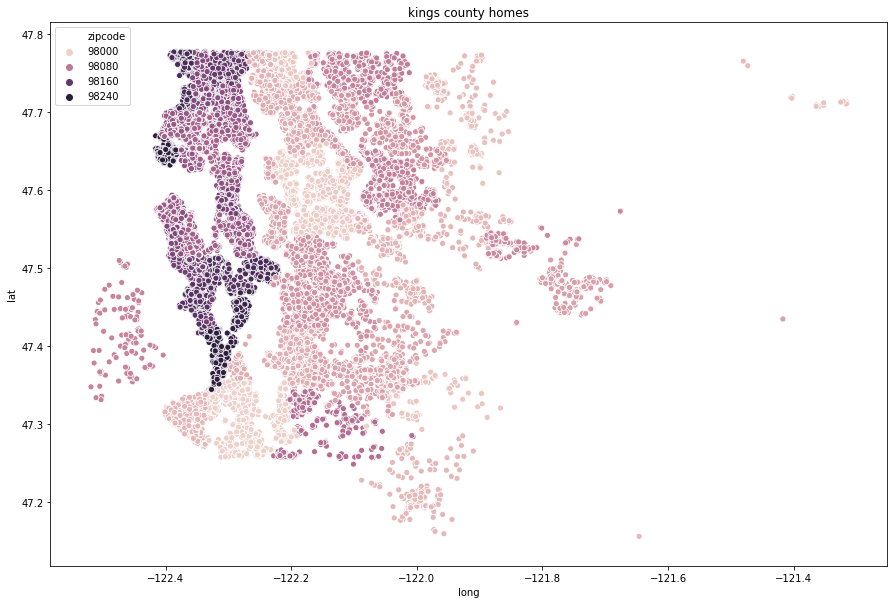

In [23]:
def get_map(df):
    plt.figure(figsize=(15,10))
    sns.scatterplot(x='long', y='lat', hue='zipcode', data=df)
    plt.title('kings county homes')
    plt.legend()
    plt.show()
get_map(df)

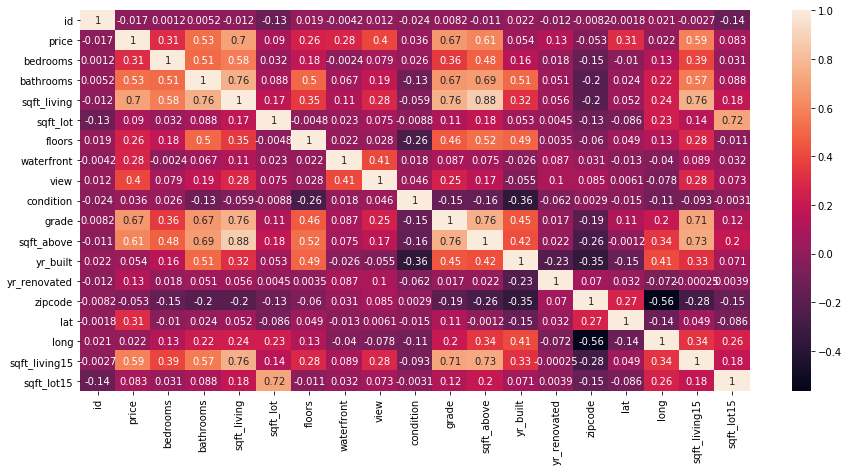

In [10]:
plt.figure(figsize = (15,7))
sns.heatmap(df.corr(), annot = True)

/Users/samuel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


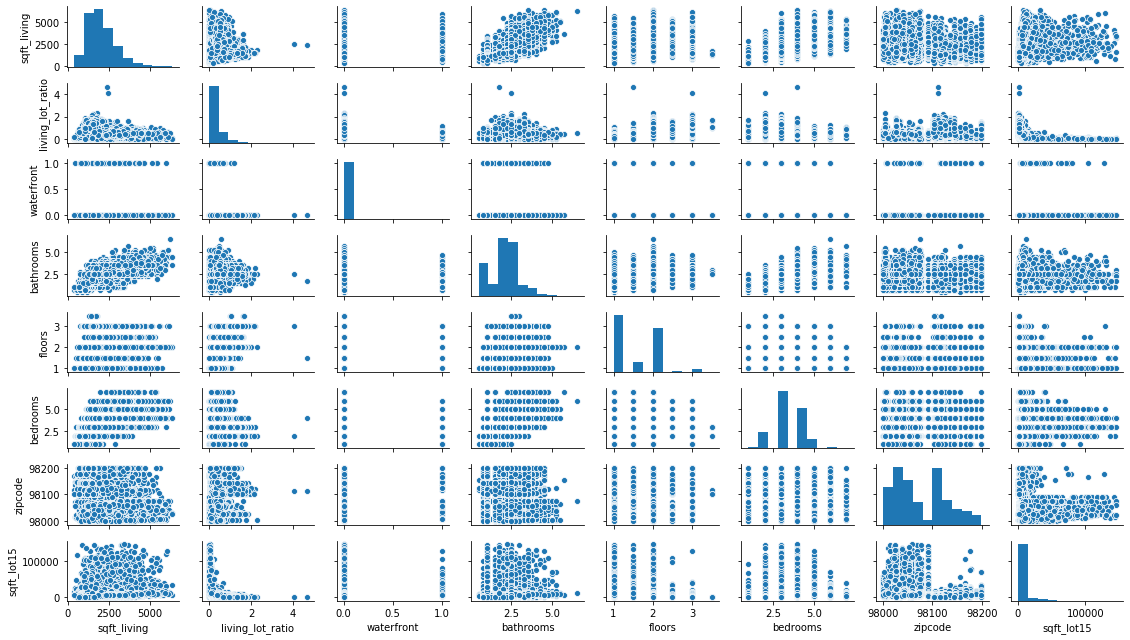

In [26]:
def get_clean_data(df):
    '''This function will drop data points that are more than 5 SD away'''
    for col in ['price', 'grade', 'bedrooms', 'sqft_living', 'sqft_lot15', 'sqft_basement']:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        mean = df[col].mean()
        std = df[col].std()
        df = df[(df[col] < (mean + 5*std)) & (df[col] > (mean - 5*std))]
    return df

def show_scatter_matrix(df):
    df = get_clean_data(df)
    df['living_lot_ratio'] = round(df.sqft_living/df.sqft_lot,3)
    plot = sns.pairplot(df[['sqft_living', 'living_lot_ratio', 'waterfront', 'bathrooms', 'floors', 'bedrooms', 
                            'zipcode', 'sqft_lot15']])
    plot.fig.set_size_inches(16,9)
    plt.savefig('pairplot.png', pad_inches=0.5)
    plt.tight_layout()

show_scatter_matrix(df)

In [27]:
def get_correlations(df):
    df = get_clean_data(df)
    return df.corr()
    
get_correlations(df)

/Users/samuel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016809,0.002668,0.010985,-0.005880,-0.113853,0.021085,-0.000646,0.019260,-0.025062,0.012819,-0.004037,-0.004314,0.027248,-0.010122,-0.017253,-0.008808,0.033348,0.001092,-0.140034
price,-0.016809,1.000000,0.318654,0.505720,0.679777,0.085855,0.274246,0.172704,0.362187,0.041909,0.677142,0.582658,0.285581,0.054690,0.126085,-0.043453,0.356512,0.027024,0.600316,0.114931
bedrooms,0.002668,0.318654,1.000000,0.519342,0.602487,0.049320,0.179435,-0.017218,0.068389,0.021979,0.362665,0.492935,0.296284,0.173740,0.014517,-0.162464,-0.019496,0.147349,0.404728,0.079271
bathrooms,0.010985,0.505720,0.519342,1.000000,0.740505,0.074301,0.509569,0.029380,0.154485,-0.131054,0.652177,0.668134,0.249624,0.524664,0.044792,-0.205698,0.018320,0.231672,0.559731,0.092641
sqft_living,-0.005880,0.679777,0.602487,0.740505,1.000000,0.162564,0.356873,0.052742,0.244269,-0.062425,0.752675,0.867194,0.401604,0.335376,0.044939,-0.201118,0.047754,0.251205,0.759787,0.234812
sqft_lot,-0.113853,0.085855,0.049320,0.074301,0.162564,1.000000,-0.032789,0.033747,0.048927,0.001757,0.107279,0.168144,0.015319,0.035155,0.002132,-0.124232,-0.065005,0.218428,0.146889,0.601829
floors,0.021085,0.274246,0.179435,0.509569,0.356873,-0.032789,1.000000,0.011995,0.017875,-0.268516,0.461491,0.531886,-0.265707,0.496271,0.002054,-0.059824,0.047321,0.128098,0.279027,-0.063484
waterfront,-0.000646,0.172704,-0.017218,0.029380,0.052742,0.033747,0.011995,1.000000,0.370584,0.018114,0.045383,0.029879,0.050309,-0.032443,0.081495,0.044847,-0.022472,-0.046107,0.053742,0.067687
view,0.019260,0.362187,0.068389,0.154485,0.244269,0.048927,0.017875,0.370584,1.000000,0.046276,0.218576,0.127502,0.253215,-0.064243,0.098920,0.099348,0.007128,-0.088597,0.256918,0.067033
condition,-0.025062,0.041909,0.021979,-0.131054,-0.062425,0.001757,-0.268516,0.018114,0.046276,1.000000,-0.152610,-0.164861,0.178566,-0.361578,-0.061480,-0.000527,-0.014513,-0.102106,-0.096669,0.025884


In [29]:
def proportion_under_1000000(df):
    df = get_clean_data(df)
    return len(df[df.price < 1000000]) / len(df)
    
print('About {:.2f}% of houses were under $1000000.'.format(100*proportion_under_1000000(df)))

About 93.78% of houses were under $1000000.


/Users/samuel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
